In [2]:
import config as config
import mne
import numpy as np
from mne.preprocessing import ICA
from src.dataset.data_loader import DataLoader
from matplotlib import pyplot as plt
from pathlib import Path
from src.utils.graphics import styled_print
from src.analysis.registery import Registery


In [3]:
reg = Registery()

╭──────────────────────────────╮
│  Initializing Register Class │
╰──────────────────────────────╯

Loading raw data for all subjects

Loading raw data for sub-01, ses-01

╭─────────────────────────────────────────╮
│ 🚀 Initializing BIDSDatasetReader Class │
╰─────────────────────────────────────────╯

Loading Raw Data

Reading 0 ... 6306999  =      0.000 ...  6306.999 secs...


Preprocessing EEG

Setting Channels and Montage

Removing Bad Channels

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 3301 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.2s


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 94.8 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 3 sensors
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


Removing Artifacts

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Omitting 399 of 6307000 (0.01%) samples, retaining 6306601 (99.99%) samples.
Selecting by number: 50 components


In [35]:
def create_epochs_for_all(
            trial_mode, trial_unit, experiment_mode, 
            trial_boundary, trial_type, modality, 
            tmin, tmax
        ):
        styled_print('', 'Creating EPOCHS for all subjects',color='red')
        epochs = {}

        for (subject, session), raw in reg.raw_data.items():
            styled_print('', f'Loading for sub-{subject}, ses-{session}', color='green')
            data_loader = DataLoader(
                eeg_data=raw, trial_mode=trial_mode, trial_unit=trial_unit,
                experiment_mode=experiment_mode, trial_boundary=trial_boundary,
                trial_type=trial_type, modality=modality
            )
            try:
                epochs[(subject, session)] = data_loader.create_epochs(tmin=tmin, tmax=tmax)
            except:
                continue

        return epochs

In [36]:
def plot_occipital_all_subjects(
            trial_mode='Silent', trial_unit='Words', experiment_mode='Experiment',
            trial_boundary='Start', trial_type='Stimulus',  modality='Pictures'
        ):
        """Plots evoked responses in occipital channels across all subjects."""
        
        


        epochs_pictorial = create_epochs_for_all(
            trial_mode=trial_mode, trial_unit=trial_unit,
            experiment_mode=experiment_mode, trial_boundary=trial_boundary,
            trial_type=trial_type, modality=modality,
            tmin=-0.2, tmax=0.5
        )

        epochs_fixation = create_epochs_for_all(
            trial_mode=trial_mode, trial_unit=trial_unit,
            experiment_mode=experiment_mode, trial_boundary=trial_boundary,
            trial_type='Fixation', modality=modality,
            tmin=0.3, tmax=1.0
        )
        if not epochs_pictorial and not epochs_fixation:
            print("No epochs available for plotting.")
            return
        
        #return epochs_fixation, epochs_pictorial
        occipital_channels = ['PO3', 'POz', 'PO4']

        fig, axes = plt.subplots(5, 4, figsize=(15, 10), sharex=True, sharey=False)
        axes = axes.flatten()

        for i, ((subject, session), epoch) in enumerate(epochs_pictorial.items()):
            evoked_pictorial = epoch.average()
            occipital_data_pictorial = evoked_pictorial.copy().pick(occipital_channels).data
            mean_signal_pictorial = np.mean(occipital_data_pictorial, axis=0)

            fixation_epoch = epochs_fixation[(subject, session)]
            evoked_fixation = fixation_epoch.average()
            occipital_data_fixation = evoked_fixation.copy().pick(occipital_channels).data
            mean_signal_fixation = np.mean(occipital_data_fixation, axis=0)

            ax = axes[i]
            ax.plot(mean_signal_pictorial, label='Pictorial', color='green')
            ax.plot(mean_signal_fixation, label='Fixation', color='blue')
            ax.axvline(200, color='cyan', linestyle='--', label="onset")
            ax.axvline(300, color='r', linestyle='--', label="100ms)")
            ax.axvline(500, color='black', linestyle='--', label="300ms)")

            ax.set_title(f"sub-{subject}_ses_{session}")
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            #ax.set_xlim([0, 0.7])
            if i == 0:
                ax.set_xlabel("Time (s)")
                ax.set_ylabel("µV")

        axes[-1].legend(loc='upper right')  
        plt.tight_layout()
        images_dir = config.IMAGES_DIR
        image_filepath = Path(images_dir, f'{trial_mode}_{trial_unit}_{experiment_mode}_{trial_boundary}_{trial_type}_Pictures_Fixation_occipital_p100_p300_plot.png')
        plt.savefig(image_filepath, dpi=600)
        print(f"Saved plot to {image_filepath}")
        
        


Creating EPOCHS for all subjects

Loading for sub-01, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-02, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-03, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-04, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-04, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-05, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-05, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-06, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-06, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-07, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-08, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-09, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-09, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-10, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-11, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-12, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-12, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-13, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-13, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-14, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Creating EPOCHS for all subjects

Loading for sub-01, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-02, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-03, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-04, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-04, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-05, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-05, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-06, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-06, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-07, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-08, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-09, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-09, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-10, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-11, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-12, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-12, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-13, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-13, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-14, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped
Saved plot to /home/owaismujtaba/projects/elsavier/Images/Silent_Words_Experiment_Start_Stimulus_Pictures_Fixation_occipital_p100_p300_plot.png


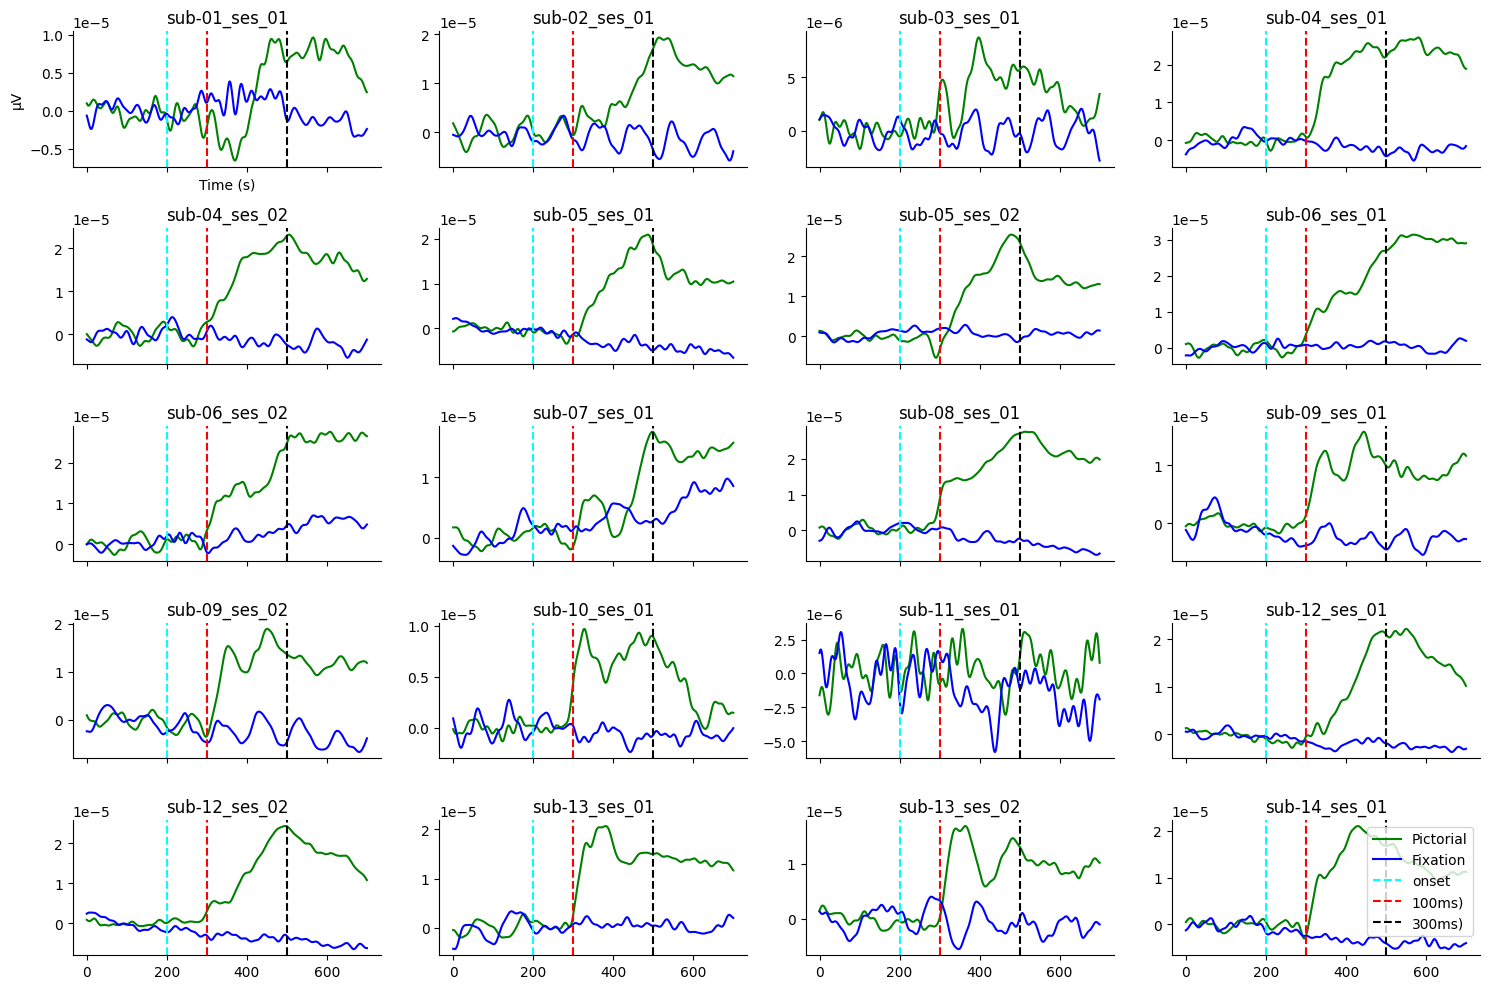

In [37]:
trial_mode='Silent'
trial_unit='Words'
experiment_mode='Experiment'
trial_boundary='Start'
trial_type='Stimulus'
modality='Pictures'
plot_occipital_all_subjects(
    trial_mode, trial_unit, experiment_mode,
    trial_boundary, trial_type, modality
)

Creating EPOCHS for all subjects

Loading for sub-01, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-02, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-03, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-04, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-04, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-05, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-05, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-06, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-06, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-07, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-08, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-09, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-09, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-10, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-11, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-12, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-12, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-13, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-13, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-14, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Creating EPOCHS for all subjects

Loading for sub-01, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-02, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-03, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-04, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-04, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-05, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-05, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-06, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-06, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-07, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-08, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-09, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-09, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-10, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-11, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-12, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-12, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-13, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-13, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-14, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped
Saved plot to /home/owaismujtaba/projects/elsavier/Images/Silent_Words_Experiment_Start_Stimulus_Pictures_Fixation_occipital_p100_p300_plot.png


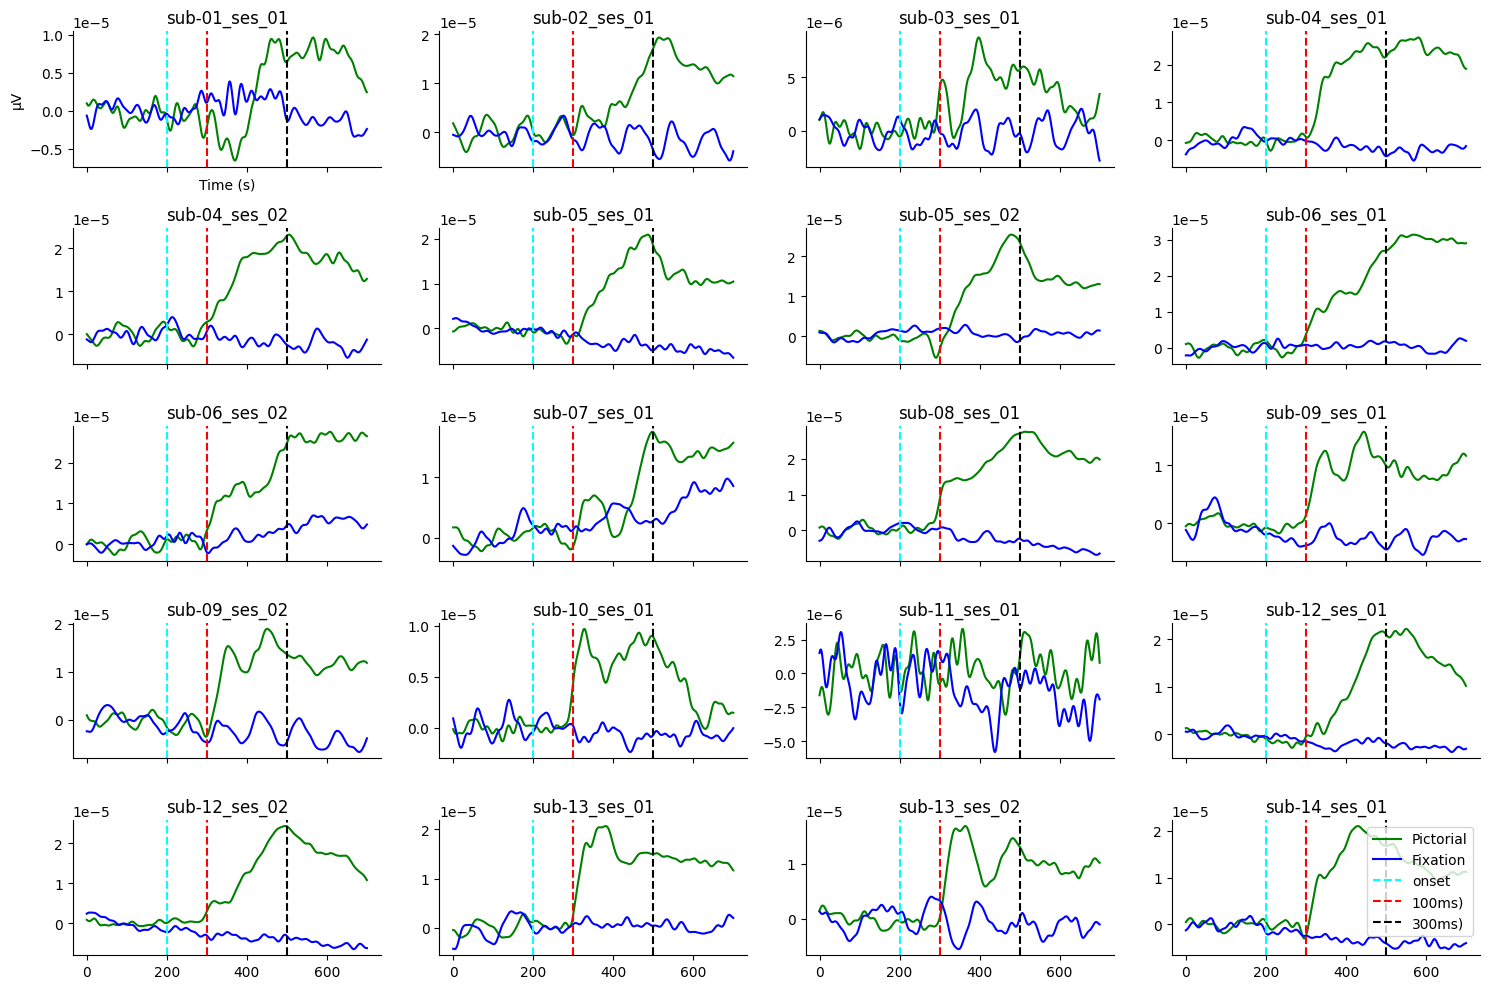

In [38]:
plot_occipital_all_subjects(
    trial_mode, trial_unit, experiment_mode,
    trial_boundary, trial_type, modality
)

Creating EPOCHS for all subjects

Loading for sub-01, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-02, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-03, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-04, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-04, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-05, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-05, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-06, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-06, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-07, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-08, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-09, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-09, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-10, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-11, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-12, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-12, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-13, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-13, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-14, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Creating EPOCHS for all subjects

Loading for sub-01, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-02, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-03, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-04, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-04, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-05, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-05, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-06, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-06, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-07, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-08, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-09, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-09, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-10, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-11, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-12, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-12, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-13, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-13, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-14, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped
Saved plot to /home/owaismujtaba/projects/elsavier/Images/Real_Words_Experiment_Start_Stimulus_Pictures_Fixation_occipital_p100_p300_plot.png


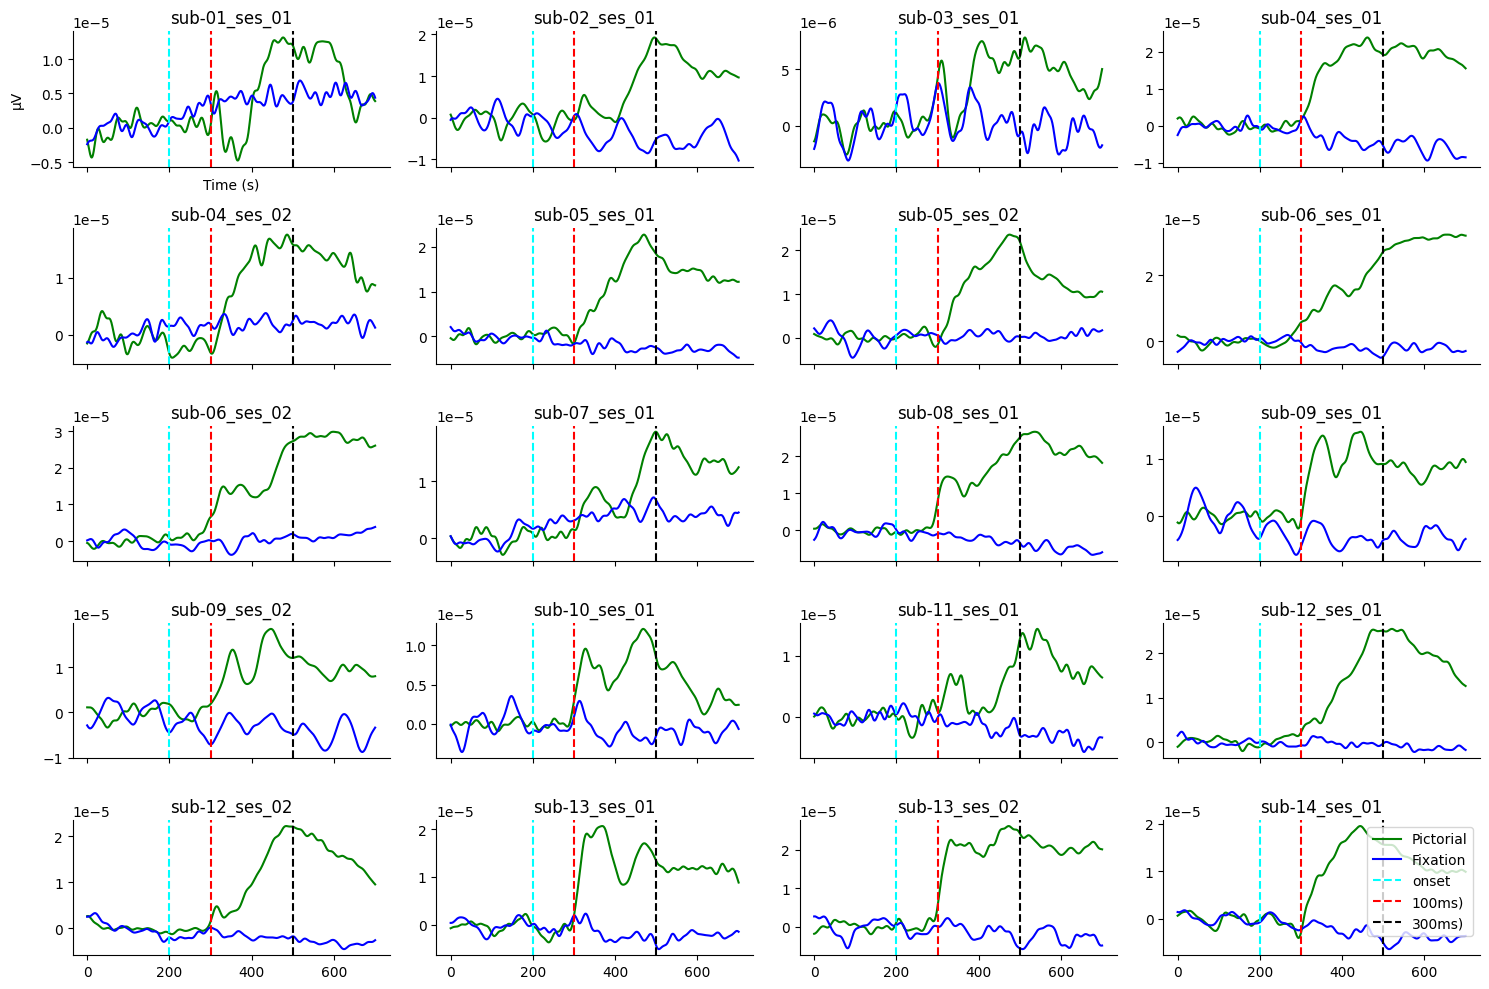

In [39]:
trial_mode='Real'
trial_unit='Words'
experiment_mode='Experiment'
trial_boundary='Start'
trial_type='Stimulus'
modality='Pictures'
plot_occipital_all_subjects(
    trial_mode, trial_unit, experiment_mode,
    trial_boundary, trial_type, modality
)

Creating EPOCHS for all subjects

Loading for sub-01, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-02, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-03, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-04, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-04, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-05, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-05, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-06, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-06, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-07, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-08, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-09, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-09, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-10, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-11, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-12, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-12, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-13, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-13, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-14, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Creating EPOCHS for all subjects

Loading for sub-01, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-02, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-03, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-04, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-04, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-05, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-05, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-06, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-06, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-07, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-08, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-09, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-09, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-10, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-11, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-12, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-12, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-13, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-13, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-14, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped
Saved plot to /home/owaismujtaba/projects/elsavier/Images/_Words_Experiment_Start_Stimulus_Pictures_Fixation_occipital_p100_p300_plot.png


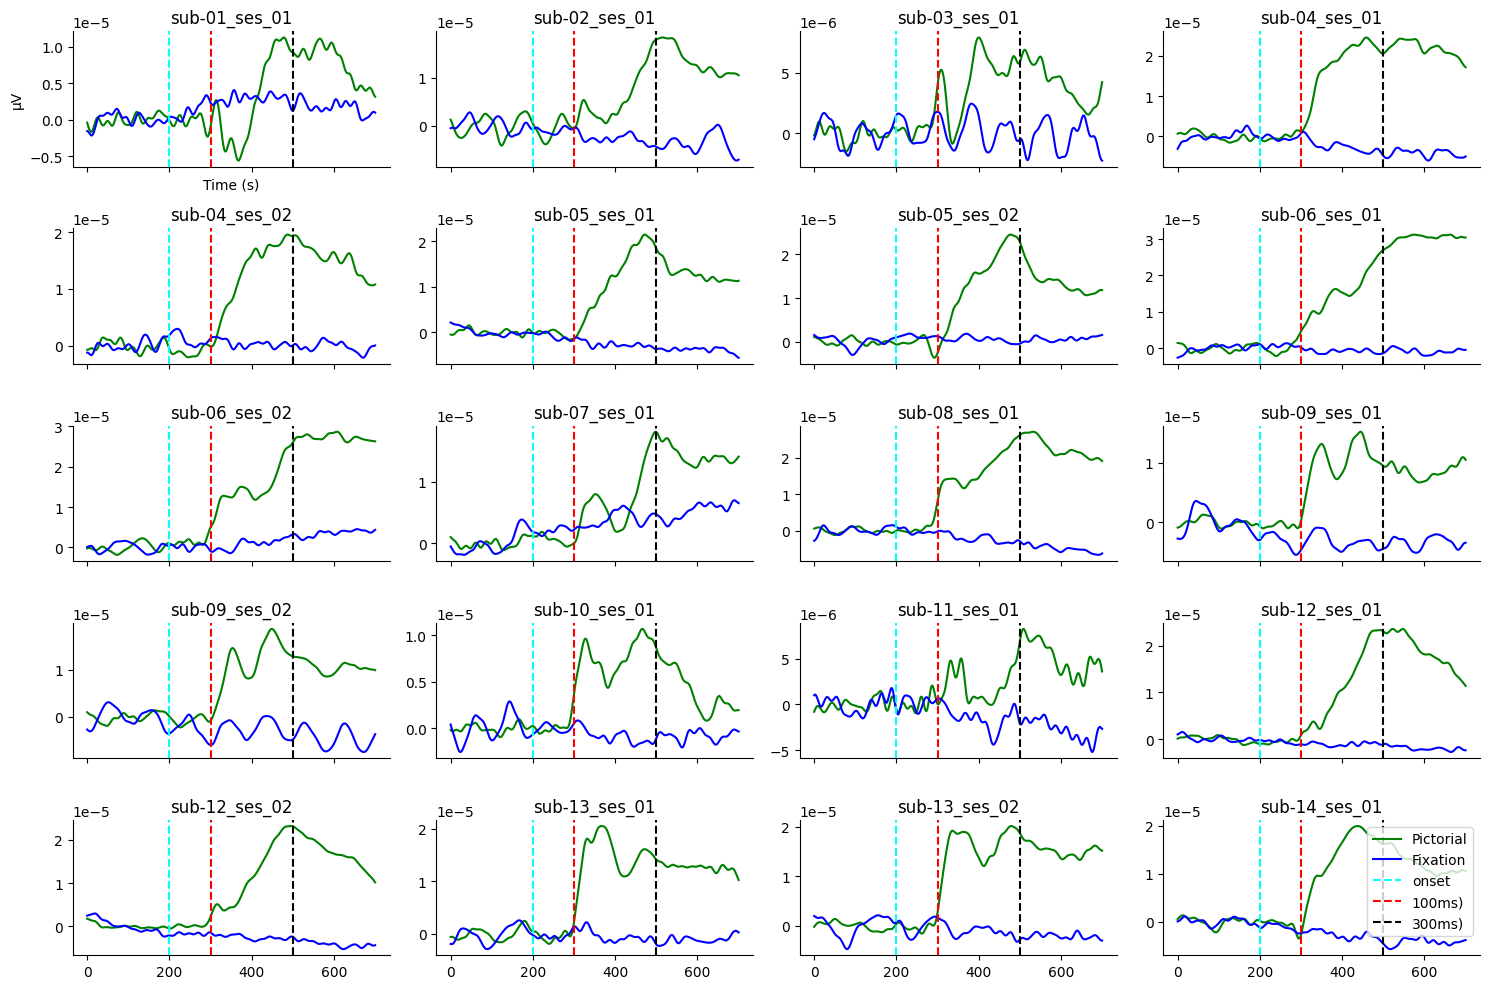

In [40]:
trial_mode=''
trial_unit='Words'
experiment_mode='Experiment'
trial_boundary='Start'
trial_type='Stimulus'
modality='Pictures'
plot_occipital_all_subjects(
    trial_mode, trial_unit, experiment_mode,
    trial_boundary, trial_type, modality
)

Creating EPOCHS for all subjects

Loading for sub-01, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Audio      ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
95 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 95 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-02, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Audio      ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
95 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 95 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-03, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Audio      ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
95 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 95 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-04, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Audio      ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
95 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 95 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-04, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Audio      ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
95 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 95 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-05, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Audio      ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
95 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 95 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-05, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Audio      ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
95 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 95 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-06, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Audio      ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
95 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 95 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-06, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Audio      ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
95 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 95 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-07, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Audio      ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
95 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 95 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-08, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Audio      ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
95 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 95 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-09, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Audio      ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
95 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 95 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-09, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Audio      ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
95 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 95 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-10, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Audio      ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
95 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 95 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-11, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Audio      ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
95 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 95 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-12, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Audio      ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
95 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 95 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-12, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Audio      ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
95 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 95 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-13, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Audio      ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
95 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 95 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-13, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Audio      ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
95 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 95 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-14, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Audio      ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
95 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 95 events and 701 original time points ...
0 bad epochs dropped


Creating EPOCHS for all subjects

Loading for sub-01, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Audio      ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
95 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 95 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-02, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Audio      ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
95 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 95 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-03, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Audio      ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
95 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 95 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-04, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Audio      ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
95 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 95 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-04, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Audio      ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
95 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 95 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-05, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Audio      ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
95 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 95 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-05, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Audio      ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
95 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 95 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-06, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Audio      ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
95 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 95 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-06, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Audio      ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
95 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 95 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-07, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Audio      ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
95 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 95 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-08, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Audio      ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
95 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 95 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-09, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Audio      ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
95 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 95 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-09, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Audio      ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
95 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 95 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-10, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Audio      ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
95 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 95 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-11, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Audio      ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
95 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 95 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-12, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Audio      ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
95 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 95 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-12, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Audio      ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
95 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 95 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-13, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Audio      ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
95 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 95 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-13, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Audio      ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
95 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 95 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-14, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Audio      ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
95 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 95 events and 701 original time points ...
0 bad epochs dropped
Saved plot to /home/owaismujtaba/projects/elsavier/Images/Silent_Words_Experiment_Start_Stimulus_Pictures_Fixation_occipital_p100_p300_plot.png


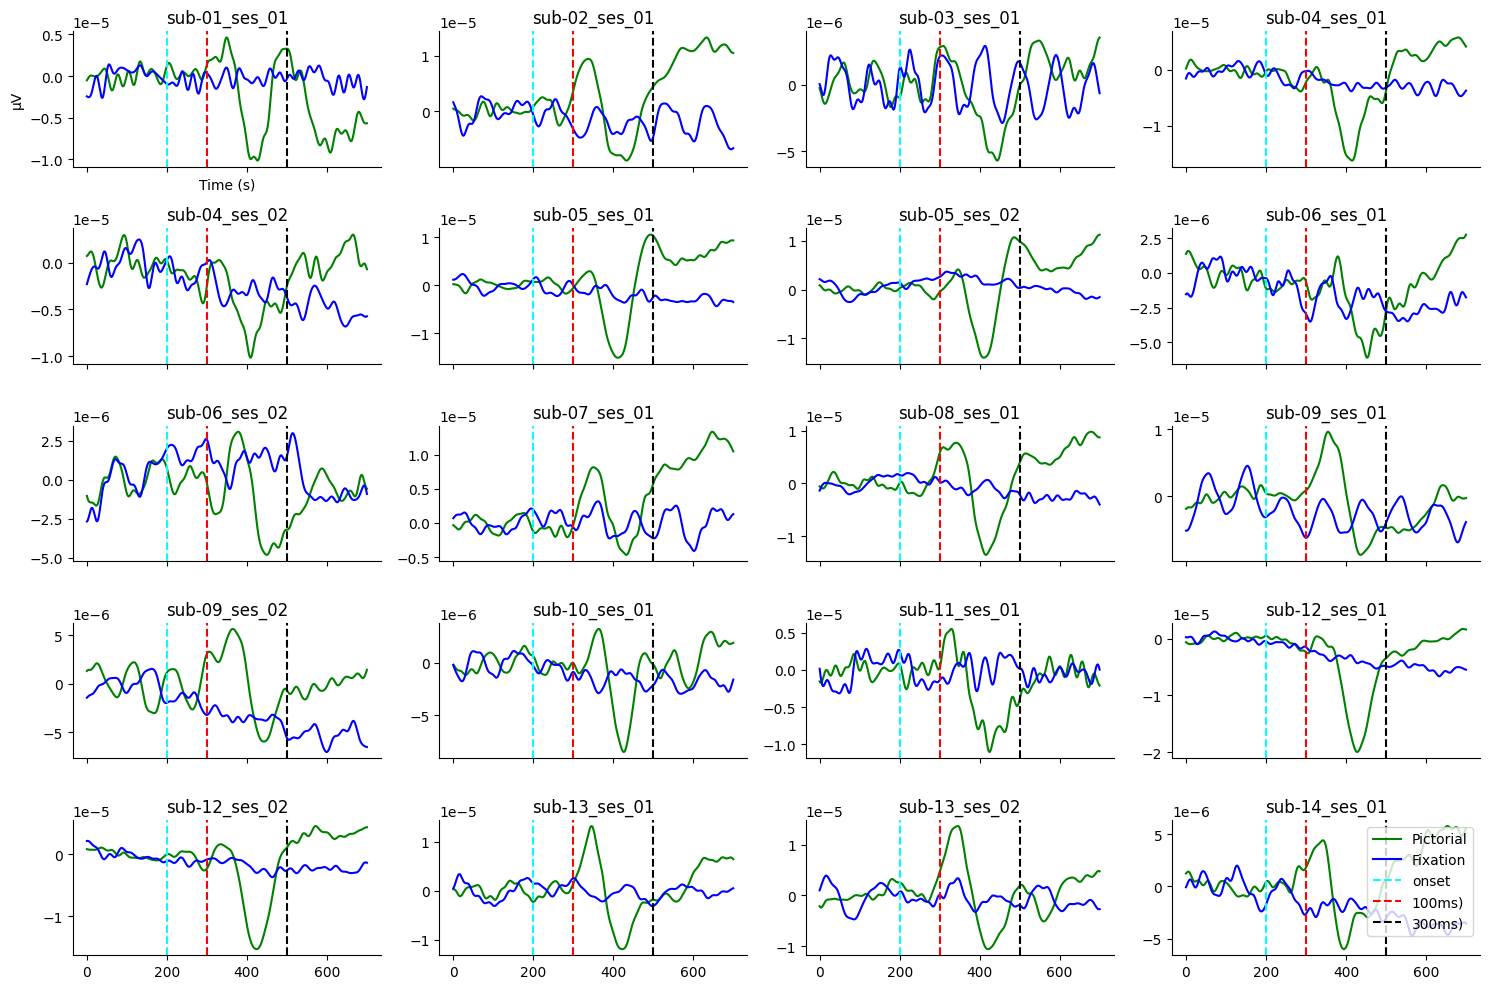

In [41]:
trial_mode='Silent'
trial_unit='Words'
experiment_mode='Experiment'
trial_boundary='Start'
trial_type='Stimulus'
modality='Audio'
plot_occipital_all_subjects(
    trial_mode, trial_unit, experiment_mode,
    trial_boundary, trial_type, modality
)